# GFAFICO

<Figure size 1200x1000 with 0 Axes>

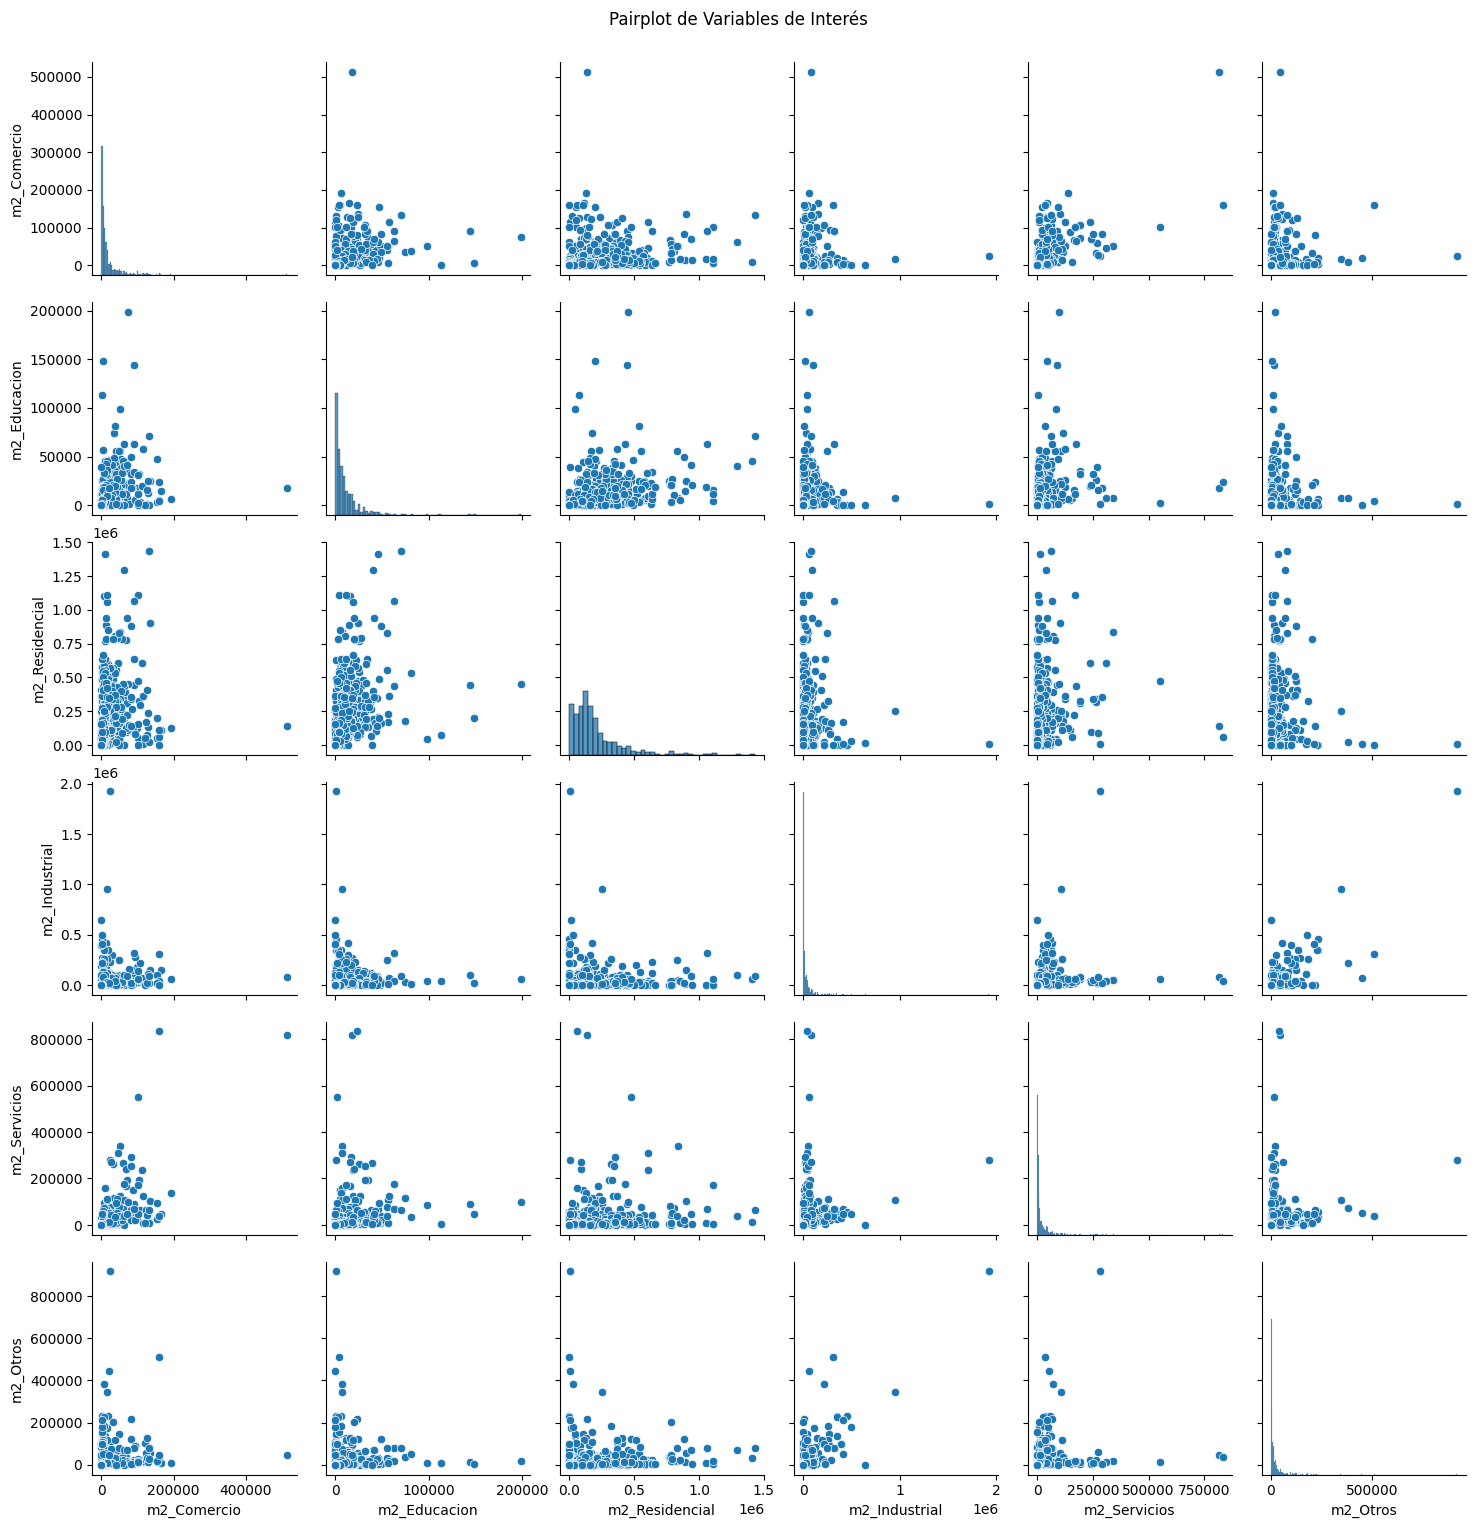

In [209]:
variables_de_interes = ['m2_Comercio','m2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios', 'm2_Otros']
g = Usos_Final[variables_de_interes]

plt.figure(figsize=(12, 10))
sns.pairplot(g)
plt.suptitle('Pairplot de Variables de Interés', y=1.02)
plt.show()


# RF FINAL FINAL

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [248]:
variables = ['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios', 'm2_Otros']
resultados_finales = []
scaler = StandardScaler()

def ajustar_modelo_rf(uso_objetivo, variables):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]
    X_normalized = scaler.fit_transform(X)

    modelo_rf = RandomForestRegressor(random_state=123)
    modelo_rf.fit(X_normalized, y)
    y_pred = modelo_rf.predict(X_normalized)

    r_squared = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    return r_squared, mse, rmse, modelo_rf.feature_importances_

resultados_rf_finales = []

for variable_dependiente in variables:
    lista_restantes = [var for var in variables if var != variable_dependiente]
    mejor_r2 = -float('inf')
    mejor_comb = None
    mejor_importancias = None
    mejor_mse = float('inf')
    mejor_rmse = float('inf')

    for r in range(1, len(lista_restantes) + 1):
        for comb in itertools.combinations(lista_restantes, r):
            r_squared, mse, rmse, importancias = ajustar_modelo_rf(variable_dependiente, comb)

            if r_squared > mejor_r2:
                mejor_r2 = r_squared
                mejor_comb = comb
                mejor_importancias = importancias
                mejor_mse = mse
                mejor_rmse = rmse

    resultados_rf_finales.append({
        'Variable Dependiente': variable_dependiente,
        'Mejor Combinación': ', '.join(mejor_comb) if mejor_comb else None,
        'Mejor R^2': mejor_r2,
        'MSE': mejor_mse,
        'RMSE': mejor_rmse,
        'Importancias': mejor_importancias
    })

resultados_rf_final = pd.DataFrame(resultados_rf_finales)

for index, row in resultados_rf_final.iterrows():
    print(f"Variable Dependiente: {row['Variable Dependiente']}")
    print(f"Mejor Combinación: {row['Mejor Combinación']}")
    print(f"Mejor R^2: {row['Mejor R^2']:.4f}")
    print(f"MSE: {row['MSE']:.4f}")
    print(f"RMSE: {row['RMSE']:.4f}")
    print("Importancias de Variables:")
    if row['Importancias'] is not None:
        importancias_df = pd.DataFrame({
            'Variable': row['Mejor Combinación'].split(', '),
            'Importancia': row['Importancias']
        })
        print(importancias_df.sort_values(by='Importancia', ascending=False))
    print("\n")

print(resultados_rf_final)


Variable Dependiente: m2_Comercio
Mejor Combinación: m2_Residencial, m2_Industrial, m2_Servicios, m2_Otros
Mejor R^2: 0.9138
MSE: 101015622.4351
RMSE: 10050.6528
Importancias de Variables:
         Variable  Importancia
2    m2_Servicios     0.636930
3        m2_Otros     0.134012
1   m2_Industrial     0.116614
0  m2_Residencial     0.112444


Variable Dependiente: m2_Educacion
Mejor Combinación: m2_Residencial, m2_Servicios
Mejor R^2: 0.9038
MSE: 26176861.7131
RMSE: 5116.3328
Importancias de Variables:
         Variable  Importancia
0  m2_Residencial      0.50193
1    m2_Servicios      0.49807


Variable Dependiente: m2_Residencial
Mejor Combinación: m2_Comercio, m2_Educacion, m2_Industrial, m2_Servicios, m2_Otros
Mejor R^2: 0.9031
MSE: 3855650135.7332
RMSE: 62093.8816
Importancias de Variables:
        Variable  Importancia
1   m2_Educacion     0.382652
4       m2_Otros     0.216545
2  m2_Industrial     0.171449
3   m2_Servicios     0.118614
0    m2_Comercio     0.110740


Variable D

In [213]:
resultados_rf_final

,Variable Dependiente,Mejor Combinación,Mejor R-squared
0,m2_Comercio,"m2_Residencial, m2_Industrial, m2_Servicios, m...",0.913848
1,m2_Educacion,"m2_Residencial, m2_Servicios",0.903800
2,m2_Residencial,"m2_Comercio, m2_Educacion, m2_Industrial, m2_S...",0.903095
3,m2_Industrial,"m2_Educacion, m2_Servicios, m2_Otros",0.923107
4,m2_Servicios,"m2_Comercio, m2_Educacion, m2_Residencial, m2_...",0.901536
5,m2_Otros,"m2_Comercio, m2_Educacion, m2_Residencial, m2_...",0.912045


## Decision Tree Regressor

In [252]:
variables_dependientes = ['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial', 'm2_Servicios', 'm2_Otros']
resultados_finales = []
scaler = StandardScaler()

def ajustar_modelo_tree(uso_objetivo, variables):
    X = Usos_Final[list(variables)]
    y = Usos_Final[uso_objetivo]
    X_normalized = scaler.fit_transform(X)
    
    modelo_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=10)
    modelo_tree.fit(X_normalized, y)
    
    y_pred = modelo_tree.predict(X_normalized)
    r_squared = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    
    return r_squared, mse, rmse, modelo_tree.feature_importances_

for variable_dependiente in variables_dependientes:
    lista_restantes = [var for var in variables_dependientes if var != variable_dependiente]
    mejor_r2 = -float('inf')
    mejor_comb = None
    mejor_importancias = None
    mejor_mse = float('inf')
    mejor_rmse = float('inf')

    for r in range(1, len(lista_restantes) + 1):
        for comb in itertools.combinations(lista_restantes, r):
            r_squared, mse, rmse, importancias = ajustar_modelo_tree(variable_dependiente, comb)

            if r_squared > mejor_r2:
                mejor_r2 = r_squared
                mejor_comb = comb
                mejor_importancias = importancias
                mejor_mse = mse
                mejor_rmse = rmse

    resultados_finales.append({
        'Variable Dependiente': variable_dependiente,
        'Mejor Combinación': ', '.join(mejor_comb) if mejor_comb else None,
        'Mejor R^2': mejor_r2,
        'MSE': mejor_mse,
        'RMSE': mejor_rmse,
        'Importancias': mejor_importancias
    })

resultados_tree_final = pd.DataFrame(resultados_finales)

for index, row in resultados_tree_final.iterrows():
    print(f"Variable Dependiente: {row['Variable Dependiente']}")
    print(f"Mejor Combinación: {row['Mejor Combinación']}")
    print(f"Mejor R^2: {row['Mejor R^2']:.4f}")
    print(f"MSE: {row['MSE']:.4f}")
    print(f"RMSE: {row['RMSE']:.4f}")
    print("Importancias de Variables:")
    if row['Importancias'] is not None:
        importancias_df = pd.DataFrame({
            'Variable': row['Mejor Combinación'].split(', '),
            'Importancia': row['Importancias']
        })
        print(importancias_df.sort_values(by='Importancia', ascending=False))
    print("\n")

print(resultados_tree_final)


Variable Dependiente: m2_Comercio
Mejor Combinación: m2_Educacion, m2_Servicios, m2_Otros
Mejor R^2: 0.6315
MSE: 432070554.5723
RMSE: 20786.3069
Importancias de Variables:
       Variable  Importancia
1  m2_Servicios     0.872119
0  m2_Educacion     0.101419
2      m2_Otros     0.026462


Variable Dependiente: m2_Educacion
Mejor Combinación: m2_Comercio, m2_Residencial, m2_Industrial
Mejor R^2: 0.6629
MSE: 91734152.0933
RMSE: 9577.7947
Importancias de Variables:
         Variable  Importancia
1  m2_Residencial     0.428750
0     m2_Comercio     0.330455
2   m2_Industrial     0.240795


Variable Dependiente: m2_Residencial
Mejor Combinación: m2_Educacion, m2_Industrial, m2_Servicios, m2_Otros
Mejor R^2: 0.5164
MSE: 19243696813.3847
RMSE: 138721.6523
Importancias de Variables:
        Variable  Importancia
0   m2_Educacion     0.555621
3       m2_Otros     0.255981
1  m2_Industrial     0.097291
2   m2_Servicios     0.091107


Variable Dependiente: m2_Industrial
Mejor Combinación: m2_Come

In [251]:
resultados_tree_final

,Variable Dependiente,Mejor Combinación,Mejor R^2,MSE,RMSE,Importancias
0,m2_Comercio,"m2_Educacion, m2_Servicios, m2_Otros",0.631503,4.320706e+08,20786.306901,"[0.1014188337661534, 0.8721190443958068, 0.026..."
1,m2_Educacion,"m2_Comercio, m2_Residencial, m2_Industrial",0.662876,9.173415e+07,9577.794741,"[0.24739002779382893, 0.42874976909234025, 0.3..."
2,m2_Residencial,"m2_Educacion, m2_Industrial, m2_Servicios, m2_...",0.516409,1.924370e+10,138721.652288,"[0.5992201615175925, 0.05973006250151762, 0.09..."
3,m2_Industrial,"m2_Comercio, m2_Educacion, m2_Servicios, m2_Otros",0.843853,1.669055e+09,40854.067347,"[0.005181829280274002, 0.05009614958281516, 0...."
4,m2_Servicios,"m2_Educacion, m2_Residencial, m2_Industrial, m...",0.662563,1.339336e+09,36596.942446,"[0.4176127820246903, 0.34856867775166966, 0.22..."
5,m2_Otros,"m2_Industrial, m2_Servicios",0.800099,6.262761e+08,25025.509079,"[0.9629289696226285, 0.03707103037737153]"


In [ ]:
from sklearn.linear_model import LinearRegression

In [218]:
from sklearn.linear_model import LinearRegression

Usos_Final.columns = Usos_Final.columns.str.strip()
if 'Valor de oferta de vivienda (uf/m2)' in Usos_Final.columns:
    data_con_valores = Usos_Final[Usos_Final['Valor de oferta de vivienda (uf/m2)'].notnull()]
    data_sin_valores = Usos_Final[Usos_Final['Valor de oferta de vivienda (uf/m2)'].isnull()]

    X = data_con_valores[['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial',
                           'm2_Servicios', 'm2_Otros', 'GSE Alto', 'GSE Medio Alto',
                           'GSE Medio', 'GSE Medio bajo', 'GSE Bajo']]
    y = data_con_valores['Valor de oferta de vivienda (uf/m2)']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  
    r_2 = r2_score(y_test, y_pred)

    print("Evaluación del modelo:")
    print(f"R^2: {r_2}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")  
    
    X_missing = data_sin_valores[['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial',
                                       'm2_Servicios', 'm2_Otros', 'GSE Alto', 'GSE Medio Alto',
                                       'GSE Medio', 'GSE Medio bajo', 'GSE Bajo']]
    X_missing_scaled = scaler.transform(X_missing)
    valores_pred = model.predict(X_missing_scaled)
    Usos_Final.loc[Usos_Final['Valor de oferta de vivienda (uf/m2)'].isnull(), 'Valor de oferta de vivienda (uf/m2)'] = valores_pred
else:
    print("La columna 'Valor de oferta de vivienda (uf/m2)' no existe")


Evaluación del modelo:
R-squared: 0.38082220106745956
MSE: 157.14480440510906
RMSE: 12.535741079214626


In [253]:
if 'Valor de oferta de vivienda (uf/m2)' in Usos_Final.columns:
    data_con_valores = Usos_Final[Usos_Final['Valor de oferta de vivienda (uf/m2)'].notnull()]
    data_sin_valores = Usos_Final[Usos_Final['Valor de oferta de vivienda (uf/m2)'].isnull()]

    X = data_con_valores[['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial',
                           'm2_Servicios', 'm2_Otros', 'GSE Alto', 'GSE Medio Alto',
                           'GSE Medio', 'GSE Medio bajo', 'GSE Bajo']]
    y = data_con_valores['Valor de oferta de vivienda (uf/m2)']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  
    r_2 = r2_score(y_test, y_pred)

    print("Evaluación del modelo:")
    print(f"R^2: {r_2}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")  
    
    X_missing = data_sin_valores[['m2_Comercio', 'm2_Educacion', 'm2_Residencial', 'm2_Industrial',
                                       'm2_Servicios', 'm2_Otros', 'GSE Alto', 'GSE Medio Alto',
                                       'GSE Medio', 'GSE Medio bajo', 'GSE Bajo']]
    X_missing_scaled = scaler.transform(X_missing)
    valores_pred = model.predict(X_missing_scaled)
    Usos_Final.loc[Usos_Final['Valor de oferta de vivienda (uf/m2)'].isnull(), 'Valor de oferta de vivienda (uf/m2)'] = valores_pred
else:
    print("La columna 'Valor de oferta de vivienda (uf/m2)' no existe")

Evaluación del modelo:
R^2: 0.47296392160547407
MSE: 66.66554264193365
RMSE: 8.16489697681077


ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required by StandardScaler.

In [261]:
modelo_rf2 = RandomForestRegressor(n_estimators=100)
modelo_rf2.fit(X_train, y_train)
y_pred_rf = modelo_rf2.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r_2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

print("Evaluación random forest:")
print(f"R^2: {r_2_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")


Evaluación random forest:
R^2: 0.39412051948090865
MSE: 76.63855663820836
RMSE: 8.754345014803127


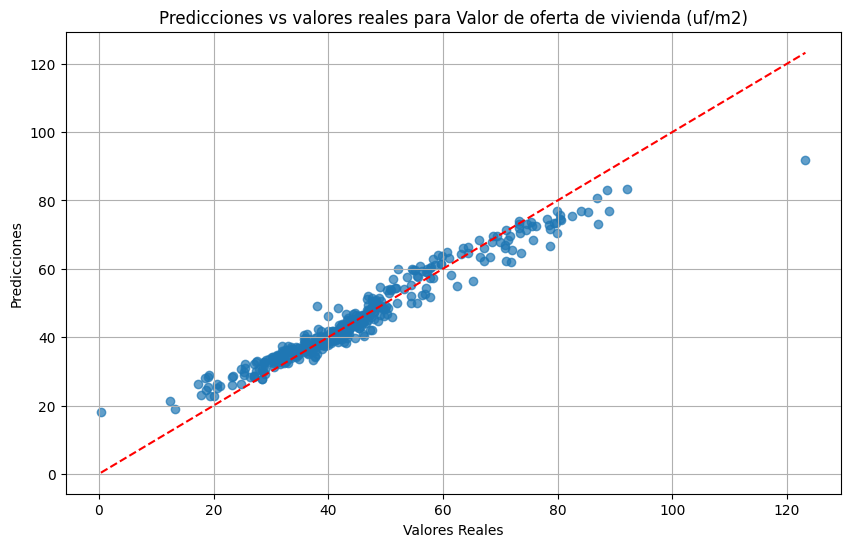

In [257]:
from sklearn.preprocessing import OneHotEncoder

variable_dependiente = 'Valor de oferta de vivienda (uf/m2)'
lista = [var for var in Usos_Final.columns if var != variable_dependiente]

X = Usos_Final[lista]
y = Usos_Final[variable_dependiente].dropna() 
X = X.loc[y.index]  
X_encoded = pd.get_dummies(X, drop_first=True)

modelo_rf2 = RandomForestRegressor()
modelo_rf2.fit(X_encoded, y)
y_pred = model_rf.predict(X_encoded)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs valores reales para ' + variable_dependiente)
plt.grid(True)
plt.show()


In [233]:
Usos_Final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Zona_EOD                             695 non-null    int64  
 1   m2_Comercio                          695 non-null    float64
 2   m2_Educacion                         695 non-null    float64
 3   m2_Residencial                       695 non-null    float64
 4   m2_Industrial                        695 non-null    float64
 5   m2_Servicios                         695 non-null    float64
 6   m2_Otros                             695 non-null    float64
 7   GSE Alto                             695 non-null    float64
 8   GSE Medio Alto                       695 non-null    float64
 9   GSE Medio                            695 non-null    float64
 10  GSE Medio bajo                       695 non-null    float64
 11  GSE Bajo                        

In [234]:
Usos_Final

,Zona_EOD,m2_Comercio,m2_Educacion,m2_Residencial,m2_Industrial,m2_Servicios,m2_Otros,GSE Alto,GSE Medio Alto,GSE Medio,GSE Medio bajo,GSE Bajo,Ed. Básica y Media,Ed. Superior,Valor de oferta de vivienda (uf/m2),AREA,Comuna,PERIMETER
0,1,12744.0,6333.0,78074.0,61992.0,10964.0,13686.0,0.0,28.0,787.0,282.0,483.0,1492.0,0.0,40.008366,3.322938e+05,Santiago,2387.304832
1,2,38325.0,37454.0,317556.0,48208.0,30940.0,20744.0,0.0,715.0,1422.0,2111.0,425.0,4316.0,3431.0,34.790000,3.210641e+05,Santiago,2269.318125
2,3,46434.0,8041.0,220002.0,97680.0,15723.0,11143.0,0.0,379.0,625.0,612.0,1452.0,1594.0,0.0,32.260000,3.306885e+05,Santiago,2301.318272
3,4,31768.0,10895.0,245378.0,51248.0,19715.0,24626.0,221.0,1272.0,450.0,323.0,139.0,1520.0,0.0,37.920000,3.174328e+05,Santiago,2256.239626
4,5,11326.0,4685.0,59895.0,67859.0,6731.0,19666.0,0.0,87.0,664.0,72.0,15.0,0.0,0.0,40.848279,3.101944e+05,Santiago,2238.872264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,692,2670.0,4087.0,95963.0,2173.0,3528.0,663.0,0.0,0.0,0.0,0.0,0.0,1705.0,0.0,43.467164,3.258026e+05,Puente Alto,2558.369697
691,693,1516.0,5224.0,31346.0,428.0,4569.0,799.0,0.0,0.0,0.0,0.0,0.0,1211.0,0.0,42.748661,7.520971e+05,Puente Alto,3695.621379
692,694,521.0,1309.0,40831.0,356.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,967.0,0.0,42.826051,2.218971e+07,Puente Alto,24603.534290
693,695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.352338,4.464453e+06,Puente Alto,8415.330798


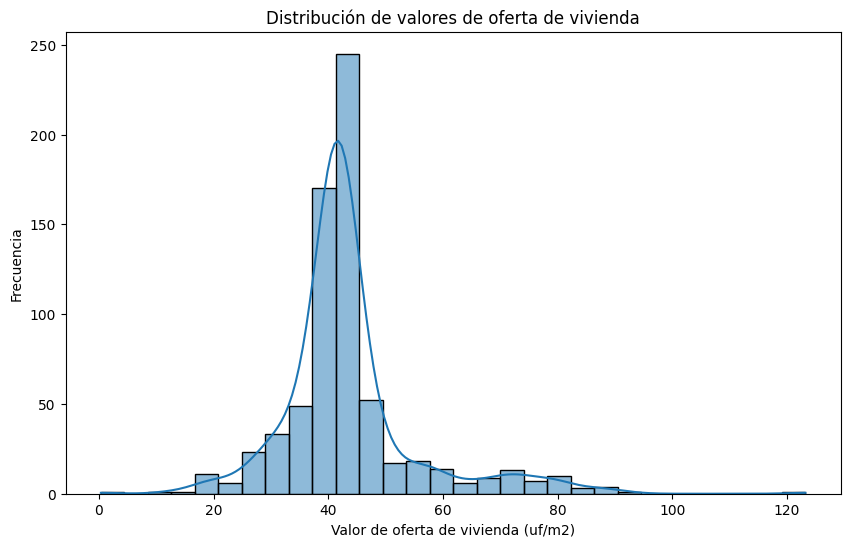

In [239]:
plt.figure(figsize=(10, 6))
sns.histplot(Usos_Final[variable_dependiente], bins=30, kde=True)
plt.title('Distribución de valores de oferta de vivienda')
plt.xlabel('Valor de oferta de vivienda (uf/m2)')
plt.ylabel('Frecuencia')
plt.show()


C:\Users\ccana\AppData\Local\Temp\ipykernel_12520\744068749.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Usos_Final.corr()


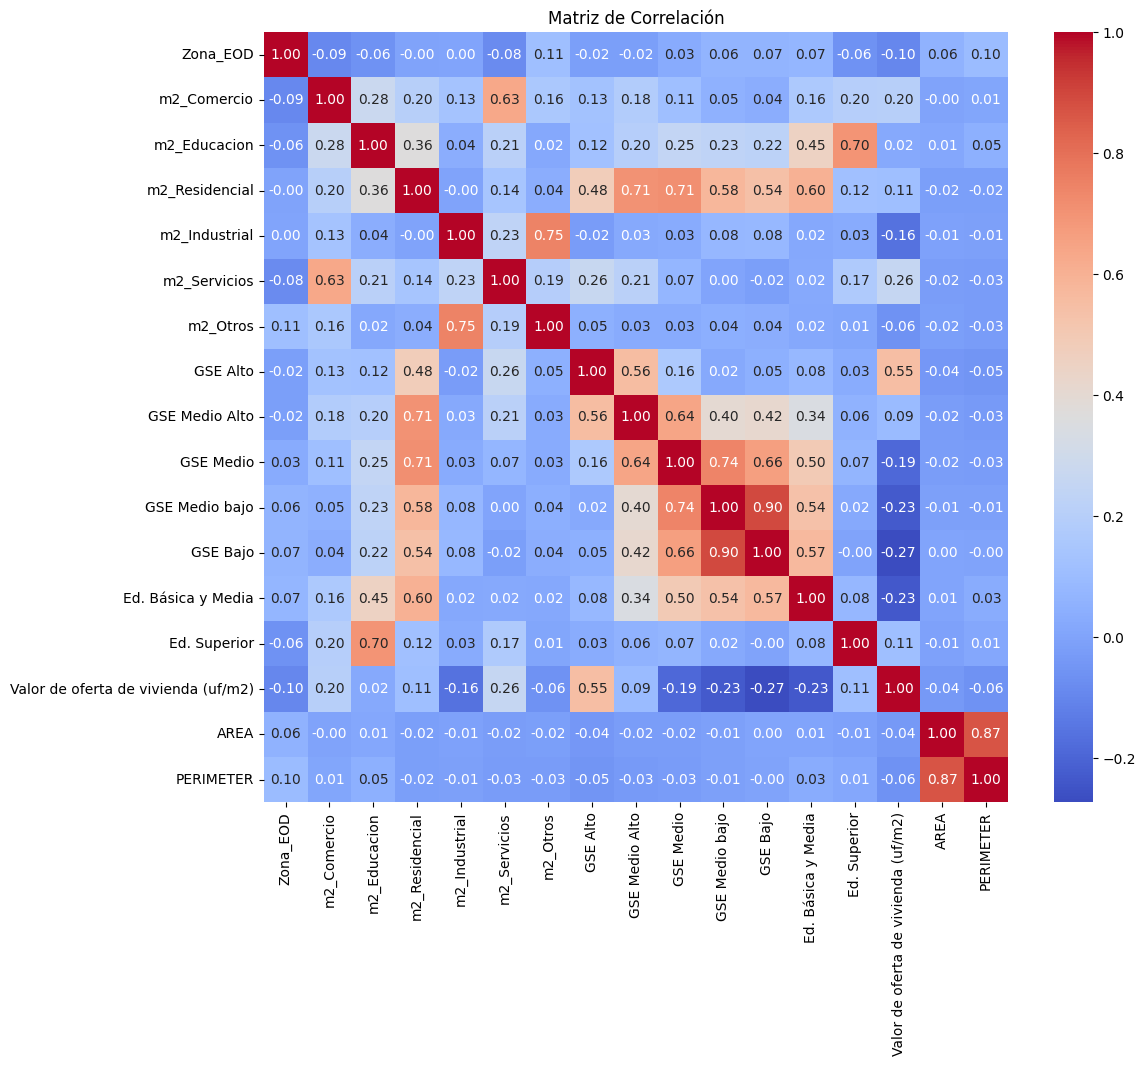

In [236]:
correlation_matrix = Usos_Final.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()
